# Contenido 

1. [Introducción](#Introducción)
2. [Obtención de datos](#Obtención-de-datos)
3. [Exploración de datos](#Exploración-de-datos)
4. [Visualización de datos para obtener información](#Visualización-de-datos-para-obtener-información)
5. [Limpieza de datos](#Limpieza-de-datos)
6. [Set de testeo](#Set-de-testeo)
    1. [Método Aleatorio](#Método-de-train_test_split())
    2. [Método Estratificación](#Método-de-StratifiedShuffleSplit())
7. [Entrenamiento y evaluación del modelo](#Entrenamiento-y-evaluación-del-modelo)
    1. [Decision Tree](#DecisionTreeClassifier())
    2. [Random Forest](#RandomForestClassifier())
    3. [Support Vector Machine](#SVC())
    4. [K-nearest neighbors](#KNeighborsClassifier())

# Introducción

El presente documento tiene como objetivo representar la predisposición de un paciente a tener un ataque cardíaco, basado en un análisis de la base de datos Heart Attack Analysis & Prediction Dataset - NAMAN MANCHANDA.

Esta base de datos proporciona una variedad de variables clínicas, recopiladas de pacientes que han sido evaluados para detectar enfermedades cardíacas. A través de esta información, se pretende desarrollar un modelo de aprendizaje automático que ayude a identificar a los pacientes con mayor riesgo de sufrir un ataque cardíaco.

El conjunto de datos incluye las siguientes características:


* `age:` Edad del paciente. Es un valor numérico que representa la edad en años.


* `sex:` Sexo del paciente. Es una variable categórica que indica el género del paciente. Se representa con los siguientes valores: 0 para mujer y 1 para hombre.


* `cp:` Tipo de dolor de pecho. Es una variable categórica que describe el tipo de dolor de pecho experimentado por el paciente. Los valores posibles son los siguientes:

    0 = Angina típica: se refiere al dolor de pecho relacionado con la reducción del flujo sanguíneo al corazón.

    1 = Angina atípica: se refiere a un tipo de dolor de pecho que no sigue los patrones típicos de la angina.

    2 = Dolor no anginoso: indica la presencia de dolor en el pecho que no está relacionado con problemas cardíacos.

    3 = Asintomático: significa que el paciente no experimenta ningún tipo de dolor de pecho.


* `trtbps:` Presión arterial en reposo. Es un valor numérico que representa la presión arterial en milímetros de mercurio (mm Hg) al momento del descanso.


* `chol:` Colesterol. Es un valor numérico que indica el nivel de colesterol medido en miligramos por decilitro (mg/dl) obtenido a través de un sensor de índice de masa corporal (BMI).


* `fbs:` Nivel de azúcar en sangre en ayunas. Es una variable categórica que indica si el nivel de azúcar en sangre del paciente en ayunas es superior a 120 mg/dl. Los valores posibles son los siguientes:
   
   1 = Verdadero (el nivel de azúcar en sangre en ayunas es superior a 120 mg/dl).
   
    0 = Falso (el nivel de azúcar en sangre en ayunas es igual o inferior a 120 mg/dl).


* `restecg:` Resultados del electrocardiograma en reposo. Es una variable categórica que describe los resultados del electrocardiograma realizado al paciente en reposo. Los valores posibles son los siguientes:

    0 = Normal: indica que los resultados del electrocardiograma son normales.

    1 = Onda ST-T anormal: indica la presencia de anormalidades en la onda ST-T del electrocardiograma en reposo.

    2 = Hipertrofia ventricular izquierda: se refiere al agrandamiento del ventrículo izquierdo del corazón, lo cual puede ser indicativo de problemas cardíacos.



* `thalachh:` Frecuencia cardíaca máxima alcanzada. Es un valor numérico que representa la frecuencia cardíaca máxima alcanzada por el paciente.


* `oldpeak:` Depresión del segmento ST inducida por el ejercicio en comparación con el reposo. Es un valor numérico que indica la disminución en el segmento ST del electrocardiograma inducida por el ejercicio en comparación con el estado de reposo anterior.


* `slp:` Pendiente. Es una variable categórica que describe la pendiente del segmento ST durante el ejercicio máximo. Los valores posibles son los siguientes:

    0 = Pendiente ascendente: indica una pendiente ascendente del segmento ST durante el ejercicio máximo.

    1 = Pendiente plana: indica una pendiente plana del segmento ST durante el ejercicio máximo.

    2 = Pendiente descendente: indica una pendiente descendente del segmento ST durante el ejercicio máximo.


* `caa:` Número de vasos principales. Es un valor numérico que indica el número de vasos principales coloreados por fluorescencia durante una angiografía. Puede variar de 0 a 3.

* `thall:` Resultado de la prueba de estrés con talio. Es una variable categórica que describe el resultado de una prueba de estrés cardíaco utilizando talio como agente de contraste. Los valores posibles son los siguientes:

    0: Valor faltante.

    1: Resultado normal.

    2: Defecto fijo.

    3: Defecto reversible.


* `exng:` Angina inducida por el ejercicio. Es una variable categórica que indica si el paciente experimenta angina (dolor de pecho) inducida por el ejercicio. Los valores posibles son los siguientes:

    1 = Sí (el paciente experimenta angina inducida por el ejercicio).

    0 = No (el paciente no experimenta angina inducida por el ejercicio).


* `output:` Variable objetivo. Es una variable categórica que indica si el paciente es propenso a tener un ataque al corazón.

    1 = Sí (el paciente es propenso a tener un ataque al corazón).

    0 = No (el paciente no es propenso a tener un ataque al corazón).

# Obtención de datos

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-attack-analysis-prediction-dataset/o2Saturation.csv
/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv


Para la obtención de la base de datos, utilizamos la página de aplicación de Kaggle para descargar los datos.

In [2]:
data = pd.read_csv('/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv')
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Exploración de datos

Vamos a familiarizarnos con los datos, por lo que vamos a obtener alguna información y examinar las diferentes variables.

In [3]:
print("El tamaño de la base de datos es de: ", data.shape)

El tamaño de la base de datos es de:  (303, 14)


In [4]:
print(data.info())
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Con esta información, podemos darnos cuenta de que la base de datos no contiene valores perdidos o inexistentes, lo cual es de gran ayuda para la preparación y limpieza de datos. Por otro lado, podemos observar que esta base de datos solo contiene información de tipo numérica. Esto simplifica el preprocesamiento y la limpieza de datos.

# Visualización de datos para obtener información

Vamos a analizar los histogramas de cada uno de los parámetros de la base de datos.

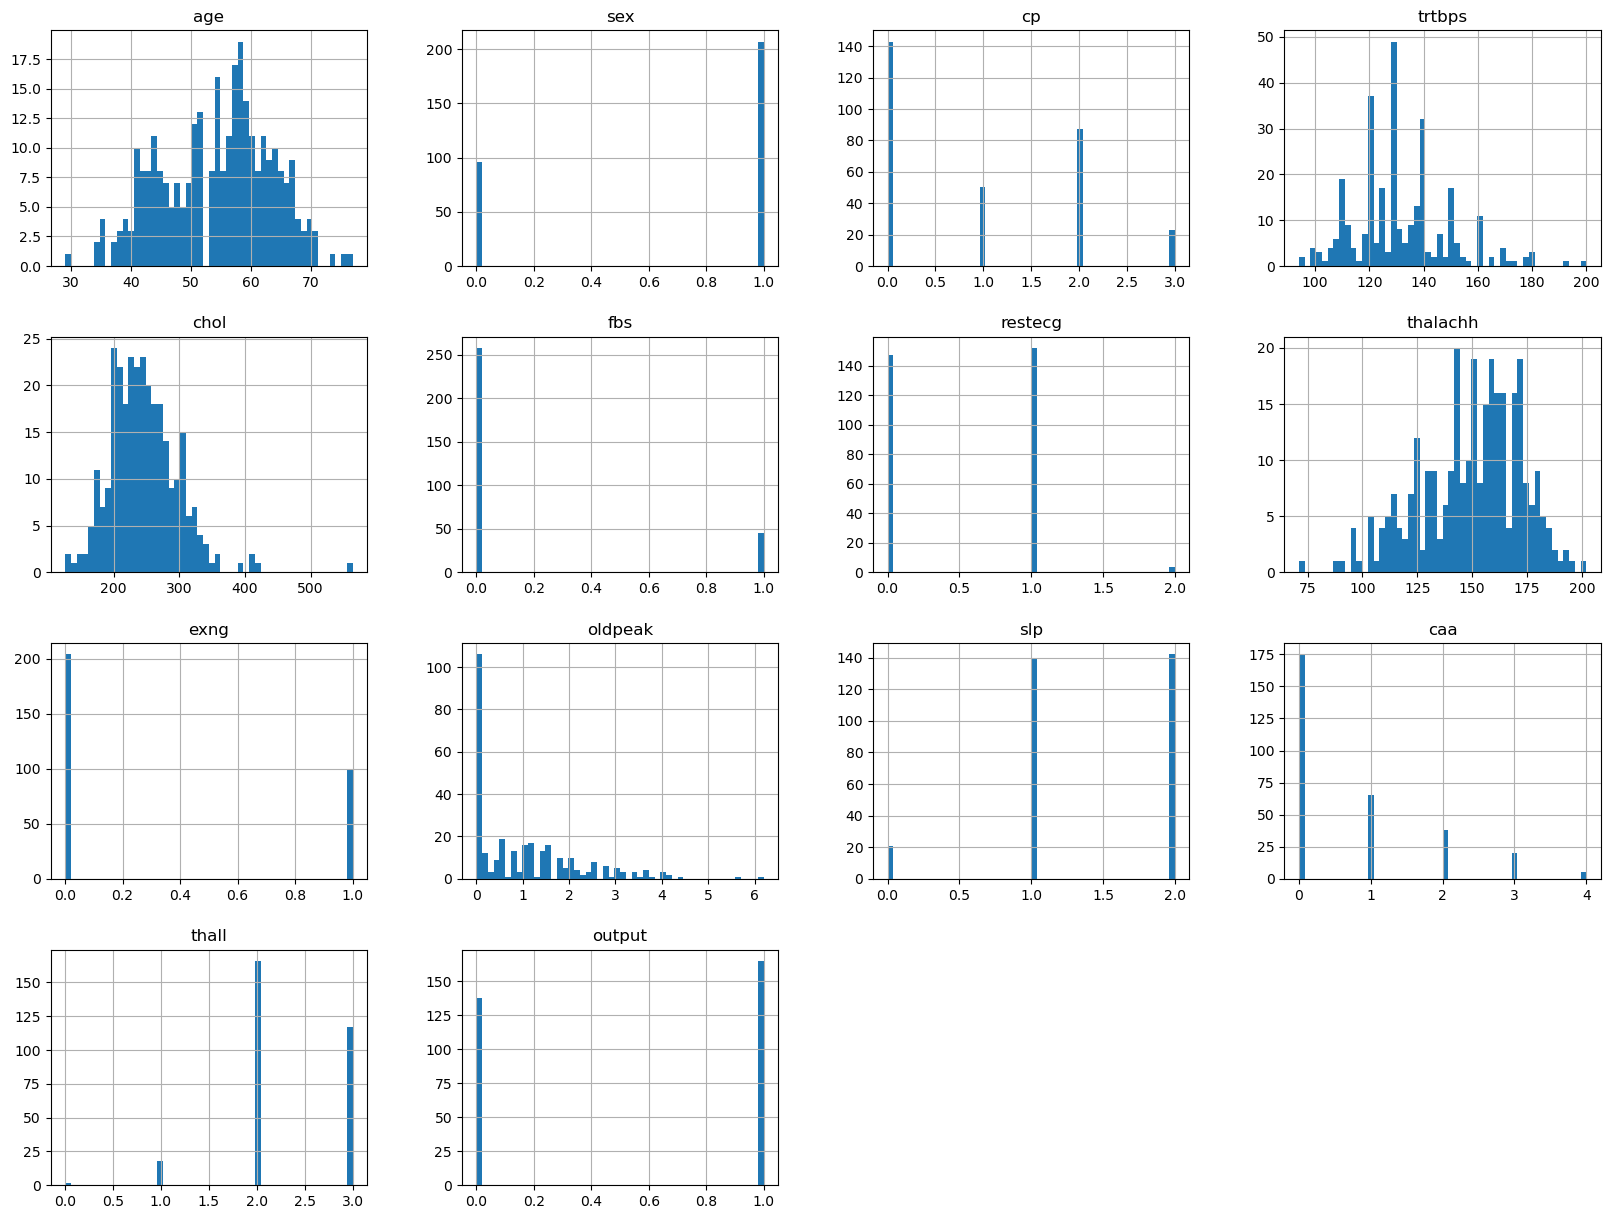

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

data.hist(bins = 50,figsize=(20,15))
plt.show()

Se pueden observar las tendencias que se tienen en la toma de datos de los pacientes; sin embargo, esto no nos dice de manera clara qué relación hay entre estas características y la enfermedad cardíaca.

Por ende, vamos a correlacionar las variables con respecto a la variable `output`.

In [6]:
corr_matrix = data.corr()
corr_matrix["output"].sort_values(ascending=False)

output      1.000000
cp          0.433798
thalachh    0.421741
slp         0.345877
restecg     0.137230
fbs        -0.028046
chol       -0.085239
trtbps     -0.144931
age        -0.225439
sex        -0.280937
thall      -0.344029
caa        -0.391724
oldpeak    -0.430696
exng       -0.436757
Name: output, dtype: float64

También, podemos graficar la correlación que existe entre todas las variables, teniendo en cuenta los tipos de correlación:

<div>
    <center>
        <img src="https://cqeacademy.com/wp-content/uploads/2014/01/Scatter-Plots-Correlation-Example.jpg" alt="typecorrelation">
    </center>
</div>

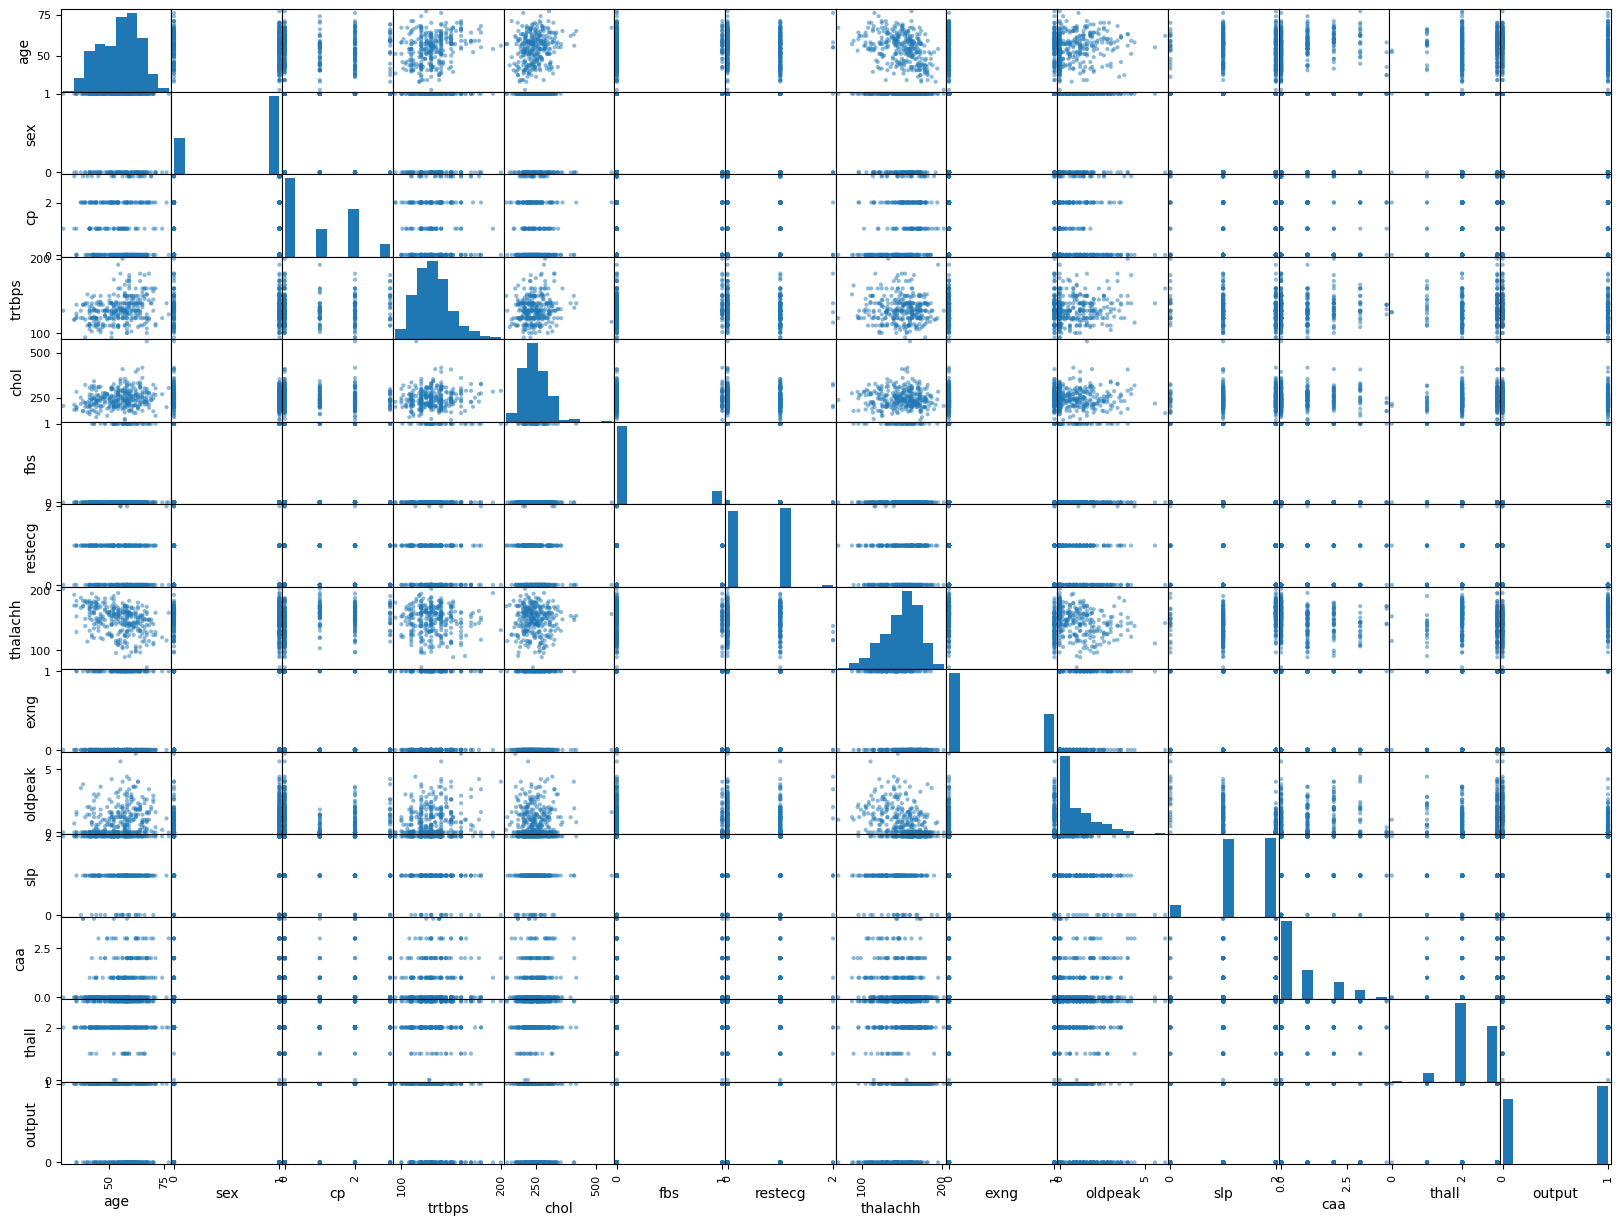

In [7]:
from pandas.plotting import scatter_matrix

attributes = data.columns

scatter_matrix(data[attributes], figsize=(20, 15));

A pesar de que estas correlaciones, a primera impresión, no sean tan claras, podemos utilizar un mapa de calor para visualizar el grado de correlación entre las variables.

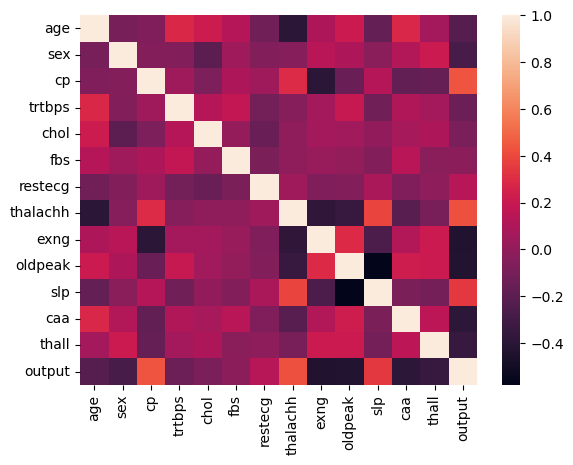

In [8]:
import seaborn as sns

sns.heatmap(corr_matrix);

Con la gráfica anterior, vamos a explorar la relación entre `slp` y `thalachh` para determinar si esta relación puede ser útil en la selección de características.

In [9]:
data["thalachh_per_slp"] = data["slp"]/data["thalachh"]
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,thalachh_per_slp
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,0.000000
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,0.000000
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,0.011628
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,0.011236
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,0.012270


In [10]:
corr_matrix = data.corr()
corr_matrix["output"].sort_values(ascending=False)

output              1.000000
cp                  0.433798
thalachh            0.421741
slp                 0.345877
thalachh_per_slp    0.220974
restecg             0.137230
fbs                -0.028046
chol               -0.085239
trtbps             -0.144931
age                -0.225439
sex                -0.280937
thall              -0.344029
caa                -0.391724
oldpeak            -0.430696
exng               -0.436757
Name: output, dtype: float64

Podemos observar, que la correlacion entre la nueva caracteristica creada `thalachh_per_slp` y `output`, no llega a emparejar sus predecesoras. Por lo que esta relacion, a pesar de que no es inutil, no nos brinda informacion.

# Limpieza de datos

Para la preparación de los datos, vamos a extraer aquellas características que consideramos tienen una menor correlación con la variable `output`.

In [11]:
data2 = data.drop(["trtbps", "chol", "fbs", "restecg", "thalachh_per_slp"], axis=1)
data2.head()

,age,sex,cp,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,150,0,2.3,0,0,1,1
1,37,1,2,187,0,3.5,0,0,2,1
2,41,0,1,172,0,1.4,2,0,2,1
3,56,1,1,178,0,0.8,2,0,2,1
4,57,0,0,163,1,0.6,2,0,2,1


Seguidamente, utilizando las herramientas que nos brinda scikit-learn (sklearn) para el preprocesamiento, vamos a crear un pipeline para normalizar los datos utilizando el método de mínimos y máximos.

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

method_pipeline = Pipeline([
    ("min_max_scaler", MinMaxScaler()),
])

In [13]:
data_transformed = pd.DataFrame(method_pipeline.fit_transform(data2),
                                 columns = list(data2.columns))
data_transformed

,age,sex,cp,thalachh,exng,oldpeak,slp,caa,thall,output
0,0.708333,1.0,1.000000,0.603053,0.0,0.370968,0.0,0.00,0.333333,1.0
1,0.166667,1.0,0.666667,0.885496,0.0,0.564516,0.0,0.00,0.666667,1.0
2,0.250000,0.0,0.333333,0.770992,0.0,0.225806,1.0,0.00,0.666667,1.0
3,0.562500,1.0,0.333333,0.816794,0.0,0.129032,1.0,0.00,0.666667,1.0
4,0.583333,0.0,0.000000,0.702290,1.0,0.096774,1.0,0.00,0.666667,1.0
...,...,...,...,...,...,...,...,...,...,...
298,0.583333,0.0,0.000000,0.396947,1.0,0.032258,0.5,0.00,1.000000,0.0
299,0.333333,1.0,1.000000,0.465649,0.0,0.193548,0.5,0.00,1.000000,0.0
300,0.812500,1.0,0.000000,0.534351,0.0,0.548387,0.5,0.50,1.000000,0.0
301,0.583333,1.0,0.000000,0.335878,1.0,0.193548,0.5,0.25,1.000000,0.0


In [14]:
data3 = data_transformed.copy()

Por el momento, en cuanto a la limpieza de datos, solo se realiza la normalización para el procesamiento de los datos, ya que no se encuentran valores inexistentes o variables categóricas que requieran un tratamiento más extenso de los datos.

# Set de testeo

En esta sección, vamos a crear el conjunto de entrenamiento y prueba. Además, realizaremos la separación de la base de datos mediante dos métodos:

* Método mediante **train_test_split():** Es una función que divide el conjunto de datos en subconjuntos de entrenamiento y prueba de forma aleatoria. La división se realiza asignando una proporción específica de los datos al subconjunto de prueba y el restante al subconjunto de entrenamiento.

* Método mediante **StratifiedShuffleSplit():** Realiza una división aleatoria del conjunto de datos, pero garantiza que los subconjuntos de entrenamiento y prueba mantengan la misma proporción de clases objetivo que el conjunto de datos original.

## Método de train_test_split()

In [15]:
from sklearn.model_selection import train_test_split

split_train_set, split_test_set = train_test_split(data3, test_size=0.2, random_state=42)

Ahora, vamos a calcular la proporción de cada valor único en la columna 'output' y en los conjuntos de entrenamiento y prueba.

In [16]:
print("Proporción con base en el conjunto de datos de prueba: ")
split_test_set["output"].value_counts() / len(split_test_set)

Proporción con base en el conjunto de datos de prueba: 


1.0    0.52459
0.0    0.47541
Name: output, dtype: float64

In [17]:
print("Proporción con base en el conjunto de datos de entrenamiento: ")
split_train_set["output"].value_counts() / len(split_train_set)

Proporción con base en el conjunto de datos de entrenamiento: 


1.0    0.549587
0.0    0.450413
Name: output, dtype: float64

Ahora, los compararemos con la proporción que existe entre esta misma característica y el conjunto de datos completo.

In [18]:
print("Proporción con base en el conjunto de datos completo: ")
data3["output"].value_counts() / len(data3)     

Proporción con base en el conjunto de datos completo: 


1.0    0.544554
0.0    0.455446
Name: output, dtype: float64

## Método de StratifiedShuffleSplit()

De manera similar, realizaremos el mismo proceso pero esta vez utilizando el método de **StratifiedShuffleSplit()**.

In [19]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(data3, data3["output"]):
    strat_train_set = data3.loc[train_index]
    strat_test_set =  data3.loc[test_index]

In [20]:
print("Proporción con base en el conjunto de datos de prueba: ")
strat_test_set["output"].value_counts() / len(strat_test_set)

Proporción con base en el conjunto de datos de prueba: 


1.0    0.540984
0.0    0.459016
Name: output, dtype: float64

In [21]:
print("Proporción con base en el conjunto de datos de entrenamiento: ")
strat_train_set["output"].value_counts() / len(strat_train_set)

Proporción con base en el conjunto de datos de entrenamiento: 


1.0    0.545455
0.0    0.454545
Name: output, dtype: float64

In [22]:
print("Proporción con base en el conjunto de datos completo: ")
data3["output"].value_counts() / len(data3)     

Proporción con base en el conjunto de datos completo: 


1.0    0.544554
0.0    0.455446
Name: output, dtype: float64

## Comparación de métodos

Vamos a comparar los resultados y errores entre la base de datos completa y la de prueba utilizando ambos métodos.

In [23]:
def income_cat_proportions(data, label):
    return data[label].value_counts() / len(data)

label = ["output"]

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(data,label),
    "Stratified": income_cat_proportions(strat_test_set,label),
    "Random": income_cat_proportions(split_test_set,label),
}).sort_index()
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props

,Overall,Stratified,Random,Strat. %error,Rand. %error
output,,,,,
0,0.455446,0.459016,0.47541,0.784034,4.383464
1,0.544554,0.540984,0.52459,-0.655738,-3.666170


Se puede observar que los porcentajes de error en la división de datos realizada mediante estratificación son menores en comparación con el método aleatorio. Esto indica que la proporción numérica se ve menos sesgada en el caso de la estratificación. Por lo tanto, utilizaremos este método para la división de los datos de entrenamiento y prueba.

# Entrenamiento y evaluación del modelo

In [24]:
data_train_set = strat_train_set.drop("output", axis=1)
train_labels = strat_train_set["output"].copy() 

data_test_set = strat_test_set.drop("output", axis=1)
test_labels = strat_test_set["output"].copy() 

Para este ejercicio, implementaremos diferentes algoritmos para clasificar los resultados. Además, analizaremos sus porcentajes de exactitud para determinar qué modelo clasifica de manera más precisa.

## DecisionTreeClassifier()

In [25]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(data_train_set, train_labels);

In [26]:
tree_yhat = tree_clf.predict(data_test_set)

#Model Evaluation
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(test_labels, tree_yhat)
print("DecisionTreeClassifier Accuracy:", accuracy)

DecisionTreeClassifier Accuracy: 0.7704918032786885


Usaremos la herramienta **GridSearchCV()** para la selección del modelo, la cual nos permite realizar múltiples combinaciones de parámetros para determinar cuál de estas funciona de manera más adecuada. Esta herramienta utiliza la técnica de validación cruzada.

La validación cruzada es ampliamente utilizada para obtener una evaluación más confiable del rendimiento del modelo y utilizar de manera eficiente los datos disponibles. Al realizar múltiples divisiones y promediar los resultados, se reduce la influencia de la selección específica de las muestras de entrenamiento y prueba, lo que proporciona una estimación más robusta del rendimiento general del modelo.

<div>
    <center>
        <img src="https://androidkt.com/wp-content/uploads/2021/07/Selection_103.png" alt="cross-validation">
    </center>
</div>


## RandomForestClassifier()

In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = [
    {"n_estimators":[50,100,110,120], "max_features":['sqrt',2,5]}, # 12
    {"bootstrap":[False], "n_estimators":[50,100,110], "max_features":['sqrt',2,5]}, # 9
]

forest_clf = RandomForestClassifier(random_state=42)

Para calcular el número de combinaciones (X), se tiene en cuenta que hay 12 opciones para el primer parámetro y 9 opciones para el segundo parámetro. Además, se realizará una validación cruzada de 5 divisiones.

$$
X = (12 + 9) * 5
\\
X = 105
$$

Entonces, en el caso del Random Forest, se tendrán un total de 105 combinaciones de entrenamiento.

In [28]:
grid_search = GridSearchCV(forest_clf, param_grid, cv=5,
                          scoring="accuracy", return_train_score=True)

grid_search.fit(data_train_set, train_labels)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid=[{'max_features': ['sqrt', 2, 5],
                          'n_estimators': [50, 100, 110, 120]},
                         {'bootstrap': [False], 'max_features': ['sqrt', 2, 5],
                          'n_estimators': [50, 100, 110]}],
             return_train_score=True, scoring='accuracy')

In [29]:
print("Mejores parámetros del modelo:")
grid_search.best_params_

Mejores parámetros del modelo:


{'max_features': 'sqrt', 'n_estimators': 50}

In [30]:
print("Mejor estimador: ")
grid_search.best_estimator_

Mejor estimador: 


RandomForestClassifier(n_estimators=50, random_state=42)

In [31]:
cvres = grid_search.cv_results_
for mean_scores, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(mean_scores)*100,'%', params)

92.27380875585945 % {'max_features': 'sqrt', 'n_estimators': 50}
91.60325574227717 % {'max_features': 'sqrt', 'n_estimators': 100}
91.38019553521661 % {'max_features': 'sqrt', 'n_estimators': 110}
91.38019553521661 % {'max_features': 'sqrt', 'n_estimators': 120}
90.94178447372421 % {'max_features': 2, 'n_estimators': 50}
90.48245592341078 % {'max_features': 2, 'n_estimators': 100}
90.48245592341078 % {'max_features': 2, 'n_estimators': 110}
90.9324336141577 % {'max_features': 2, 'n_estimators': 120}
89.09503448603647 % {'max_features': 5, 'n_estimators': 50}
89.55198391509398 % {'max_features': 5, 'n_estimators': 100}
90.01133715441922 % {'max_features': 5, 'n_estimators': 110}
89.77958648634925 % {'max_features': 5, 'n_estimators': 120}
90.70772379716395 % {'bootstrap': False, 'max_features': 'sqrt', 'n_estimators': 50}
90.47775687867113 % {'bootstrap': False, 'max_features': 'sqrt', 'n_estimators': 100}
90.47305758986963 % {'bootstrap': False, 'max_features': 'sqrt', 'n_estimators': 

In [32]:
final_model = grid_search.best_estimator_

final_yhat = final_model.predict(data_test_set)

accuracy = accuracy_score(test_labels, final_yhat)
print("RandomForestClassifier Exactitud:", accuracy)

RandomForestClassifier Exactitud: 0.8360655737704918


## SVC()

In [33]:
from sklearn.svm import SVC

param_grid = [
    {"kernel":['linear','poly','rbf'], "degree":[2,3,4,5]}, # 12
    {"gamma":[1,'auto'], "kernel":['linear','rbf'], "degree":[2,3,4]}, # 6
    {"C":[5,10,11,12], "kernel":['rbf'], "gamma":[1,'auto','scale']}, # 12
]

SVC_clf = SVC(random_state=42)

In [34]:
grid_search = GridSearchCV(SVC_clf, param_grid, cv=5,
                          scoring="accuracy", return_train_score=True)

grid_search.fit(data_train_set, train_labels)

GridSearchCV(cv=5, estimator=SVC(random_state=42),
             param_grid=[{'degree': [2, 3, 4, 5],
                          'kernel': ['linear', 'poly', 'rbf']},
                         {'degree': [2, 3, 4], 'gamma': [1, 'auto'],
                          'kernel': ['linear', 'rbf']},
                         {'C': [5, 10, 11, 12], 'gamma': [1, 'auto', 'scale'],
                          'kernel': ['rbf']}],
             return_train_score=True, scoring='accuracy')

In [35]:
print("Mejores parámetros del modelo:")
grid_search.best_params_

Mejores parámetros del modelo:


{'C': 12, 'gamma': 1, 'kernel': 'rbf'}

In [36]:
print("Mejor estimador: ")
grid_search.best_estimator_

Mejor estimador: 


SVC(C=12, gamma=1, random_state=42)

In [37]:
cvres = grid_search.cv_results_
for mean_scores, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(mean_scores)*100,'%', params)

91.60789705435383 % {'degree': 2, 'kernel': 'linear'}
91.38950058035404 % {'degree': 2, 'kernel': 'poly'}
91.61253813129042 % {'degree': 2, 'kernel': 'rbf'}
91.60789705435383 % {'degree': 3, 'kernel': 'linear'}
91.38950058035404 % {'degree': 3, 'kernel': 'poly'}
91.61253813129042 % {'degree': 3, 'kernel': 'rbf'}
91.60789705435383 % {'degree': 4, 'kernel': 'linear'}
91.17990738207668 % {'degree': 4, 'kernel': 'poly'}
91.61253813129042 % {'degree': 4, 'kernel': 'rbf'}
91.60789705435383 % {'degree': 5, 'kernel': 'linear'}
88.88003073776234 % {'degree': 5, 'kernel': 'poly'}
91.61253813129042 % {'degree': 5, 'kernel': 'rbf'}
91.60789705435383 % {'degree': 2, 'gamma': 1, 'kernel': 'linear'}
91.38484817621834 % {'degree': 2, 'gamma': 1, 'kernel': 'rbf'}
91.60789705435383 % {'degree': 2, 'gamma': 'auto', 'kernel': 'linear'}
90.70772379716395 % {'degree': 2, 'gamma': 'auto', 'kernel': 'rbf'}
91.60789705435383 % {'degree': 3, 'gamma': 1, 'kernel': 'linear'}
91.38484817621834 % {'degree': 3, 'gam

In [38]:
final_model = grid_search.best_estimator_

final_yhat = final_model.predict(data_test_set)

accuracy = accuracy_score(test_labels, final_yhat)
print("SVC Exactitud:", accuracy)

SVC Exactitud: 0.7868852459016393


## KNeighborsClassifier()

In [39]:
from sklearn.neighbors import KNeighborsClassifier

param_grid = [
    {"n_neighbors":[2,3,4,5], "algorithm":['auto', 'ball_tree', 'kd_tree']}, # 12
    {"n_neighbors":[2,3,4,5], "weights":['uniform', 'distance']}, # 6
    {"n_neighbors":[3,4,5], "weights":['uniform', 'distance'], "algorithm":['ball_tree', 'kd_tree']}, # 6
]

KNN_clf = KNeighborsClassifier()

In [40]:
grid_search = GridSearchCV(KNN_clf, param_grid, cv=5,
                          scoring="accuracy", return_train_score=True)

grid_search.fit(data_train_set, train_labels)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'algorithm': ['auto', 'ball_tree', 'kd_tree'],
                          'n_neighbors': [2, 3, 4, 5]},
                         {'n_neighbors': [2, 3, 4, 5],
                          'weights': ['uniform', 'distance']},
                         {'algorithm': ['ball_tree', 'kd_tree'],
                          'n_neighbors': [3, 4, 5],
                          'weights': ['uniform', 'distance']}],
             return_train_score=True, scoring='accuracy')

In [41]:
print("Mejores parámetros del modelo:")
grid_search.best_params_

Mejores parámetros del modelo:


{'algorithm': 'auto', 'n_neighbors': 5}

In [42]:
print("Mejor estimador: ")
grid_search.best_estimator_

Mejor estimador: 


KNeighborsClassifier()

In [43]:
cvres = grid_search.cv_results_
for mean_scores, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(mean_scores)*100,'%', params)

88.84175337563495 % {'algorithm': 'auto', 'n_neighbors': 2}
90.00661351362174 % {'algorithm': 'auto', 'n_neighbors': 3}
89.5472360432928 % {'algorithm': 'auto', 'n_neighbors': 4}
90.47305758986963 % {'algorithm': 'auto', 'n_neighbors': 5}
88.84175337563495 % {'algorithm': 'ball_tree', 'n_neighbors': 2}
90.00661351362174 % {'algorithm': 'ball_tree', 'n_neighbors': 3}
89.5472360432928 % {'algorithm': 'ball_tree', 'n_neighbors': 4}
90.47305758986963 % {'algorithm': 'ball_tree', 'n_neighbors': 5}
88.84175337563495 % {'algorithm': 'kd_tree', 'n_neighbors': 2}
90.00661351362174 % {'algorithm': 'kd_tree', 'n_neighbors': 3}
89.5472360432928 % {'algorithm': 'kd_tree', 'n_neighbors': 4}
90.47305758986963 % {'algorithm': 'kd_tree', 'n_neighbors': 5}
88.84175337563495 % {'n_neighbors': 2, 'weights': 'uniform'}
89.78905740641213 % {'n_neighbors': 2, 'weights': 'distance'}
90.00661351362174 % {'n_neighbors': 3, 'weights': 'uniform'}
90.2424926683278 % {'n_neighbors': 3, 'weights': 'distance'}
89.547

In [44]:
final_model = grid_search.best_estimator_

final_yhat = final_model.predict(data_test_set)

accuracy = accuracy_score(test_labels, final_yhat)
print("KNeighborsClassifier Exactitud:", accuracy)

KNeighborsClassifier Exactitud: 0.7868852459016393
